In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/taylor-swift-spotify-data/spotify_taylorswift.csv


In [6]:
import matplotlib.pyplot as plt

# Taylor Swift, Popular Songs

In [3]:
df = pd.read_csv(
    "/kaggle/input/taylor-swift-spotify-data/spotify_taylorswift.csv",
    index_col=0,
    parse_dates=["release_date"],
)

print("df shape:", df.shape)
print(df.info())
df.head()

df shape: (171, 15)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 171 entries, 0 to 170
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              171 non-null    object        
 1   album             171 non-null    object        
 2   artist            171 non-null    object        
 3   release_date      171 non-null    datetime64[ns]
 4   length            171 non-null    int64         
 5   popularity        171 non-null    int64         
 6   danceability      171 non-null    float64       
 7   acousticness      171 non-null    float64       
 8   energy            171 non-null    float64       
 9   instrumentalness  171 non-null    float64       
 10  liveness          171 non-null    float64       
 11  loudness          171 non-null    float64       
 12  speechiness       171 non-null    float64       
 13  valence           171 non-null    float64       
 14  tempo 

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
0,Tim McGraw,Taylor Swift,Taylor Swift,2006-10-24,232106,49,0.580,0.575,0.491,0.0,0.1210,-6.462,0.0251,0.425,76.009
1,Picture To Burn,Taylor Swift,Taylor Swift,2006-10-24,173066,54,0.658,0.173,0.877,0.0,0.0962,-2.098,0.0323,0.821,105.586
2,Teardrops On My Guitar - Radio Single Remix,Taylor Swift,Taylor Swift,2006-10-24,203040,59,0.621,0.288,0.417,0.0,0.1190,-6.941,0.0231,0.289,99.953
3,A Place in this World,Taylor Swift,Taylor Swift,2006-10-24,199200,49,0.576,0.051,0.777,0.0,0.3200,-2.881,0.0324,0.428,115.028
4,Cold As You,Taylor Swift,Taylor Swift,2006-10-24,239013,50,0.418,0.217,0.482,0.0,0.1230,-5.769,0.0266,0.261,175.558


Top 10 most popular songs:

In [5]:
mask = df["popularity"] > 0
df[mask].sort_values("popularity", ascending=True).head(10)

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
35,Back To December,Speak Now (Deluxe Package),Taylor Swift,2010-01-01,293040,43,0.525,0.11300,0.676,0.000000,0.2940,-4.684,0.0294,0.281,141.950
22,Never Grow Up,Speak Now (Deluxe Package),Taylor Swift,2010-01-01,290480,44,0.715,0.82900,0.308,0.000000,0.1600,-8.829,0.0305,0.547,124.899
25,Innocent,Speak Now (Deluxe Package),Taylor Swift,2010-01-01,302266,44,0.553,0.20200,0.604,0.000000,0.1250,-5.295,0.0258,0.186,133.989
15,Mine - POP Mix,Speak Now (Deluxe Package),Taylor Swift,2010-01-01,230546,45,0.696,0.00461,0.768,0.000001,0.1010,-3.863,0.0308,0.692,121.050
13,A Perfectly Good Heart,Taylor Swift,Taylor Swift,2006-10-24,220146,46,0.483,0.00349,0.751,0.000000,0.1280,-5.726,0.0365,0.268,156.092
26,Haunted,Speak Now (Deluxe Package),Taylor Swift,2010-01-01,242093,47,0.434,0.07690,0.944,0.000000,0.1510,-2.641,0.0581,0.361,162.020
31,Superman,Speak Now (Deluxe Package),Taylor Swift,2010-01-01,276266,47,0.582,0.01870,0.817,0.000002,0.1010,-3.718,0.0337,0.547,131.983
28,Long Live,Speak Now (Deluxe Package),Taylor Swift,2010-01-01,317960,47,0.412,0.04260,0.682,0.000075,0.1060,-4.319,0.0339,0.146,203.959
5,The Outside,Taylor Swift,Taylor Swift,2006-10-24,207106,47,0.589,0.00491,0.805,0.000000,0.2400,-4.055,0.0293,0.591,112.982
6,Tied Together with a Smile,Taylor Swift,Taylor Swift,2006-10-24,248106,47,0.479,0.52500,0.578,0.000000,0.0841,-4.963,0.0294,0.192,146.165


Relationship between popularity and danceability

Text(0.5, 1.0, 'Taylor Swift: Popularity vs Danceability')

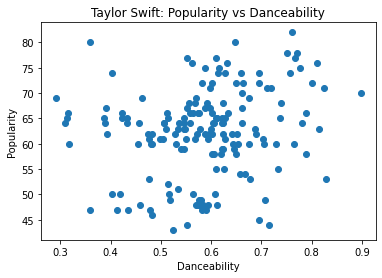

In [10]:
plt.scatter(df[mask]["danceability"], df[mask]["popularity"])
plt.xlabel("Danceability")
plt.ylabel("Popularity")
plt.title("Taylor Swift: Popularity vs Danceability")

In [11]:
df[mask]["danceability"].corr(df[mask]["popularity"])

0.2065274775511306